# WordCloud Typography
**Using OpenCV, bs4, wordcloud and googlesearch**

## 1. Searching Google with Keyword

### 1.1 Importing googlesearch module

In [1]:
from googlesearch import search

### 1.2 Search Google with a Keyword

In [2]:
def searchgoogle(keyword, times):
    results = []
    for page in search(keyword, tld="co.in", num=times, stop=times, pause=2):
        results.append(page)
    return results   

## 2. Web Scraping

### 2.1 Importing Necessary Modules

In [3]:
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error
import ssl

### 2.2 Turn off the SSL Certificate check

In [4]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

### 2.3 Scrap the given URL

In [5]:
def webscrap(url):
    try:
        result = {}
        html = urllib.request.urlopen(url, context=ctx).read()
        soup = BeautifulSoup(html, 'html.parser')
        
        try:
            tags = soup.find_all('p')
            result['p'] = tags
        except:
            result['p'] = ""
            
        try:
            tags = soup.find_all('h1')
            result['h1'] = tags
        except:
            result['h1'] = ""
            
        try:
            tags = soup.find_all('h2')
            result['h2'] = tags
        except:
            result['h2'] = ""
            
        try:
            tags = soup.find_all('h3')
            result['h3'] = tags
        except:
            result['h3'] = ""
             
        try:
            tags = soup.find_all('h4')
            result['h4'] = tags
        except:
            result['h4'] = ""
            
        try:
            tags = soup.find_all('h5')
            result['h5'] = tags
        except:
            result['h5'] = ""
        
        return result
    
    except:
        return None    

### 2.4 Basic Pre-Processing

#### 2.4.a Import Necessary Modules

In [6]:
import re

#### 2.4.b Remove all Hyperlinks (and hrefs)

In [7]:
def remove_links(text):
    text = re.sub(r'\"http.*?\"', '', text)
    text = re.sub(r'href=', '', text)
    return text

#### 2.4.c Remove all HTML Tags

In [8]:
def remove_tags(text):
    text = text.replace('<p>', '')
    text = text.replace('</p>', '')
    text = text.replace('<a>', '')
    text = text.replace('</a>', '')
    text = text.replace('<span>', '')
    text = text.replace('</span>', '')
    text = text.replace('<strong>', '')
    text = text.replace('</strong>', '')
    text = re.sub(r'<.*?>', '', text)
    return text

#### 2.4.d Convert to Lowercase

In [9]:
def convert_to_lowercase(text):
    return text.lower()

#### 2.4.e Remove Punctuation

In [10]:
def remove_punctuation(text):
    punctuation = r'[,.\[\]\(\)@#\"\'/$%&*!+-_;:]'
    #text = text.replace('[^\w\s]', '')
    #text = text.replace(',', ' ')
    #text = text.replace('.', ' ')
    #text = text.replace('[', ' ')
    #text = text.replace(']', ' ')
    #text = text.replace('(', ' ')
    #text = text.replace(')', ' ')
    text = re.sub(punctuation, ' ', text)
    return text

#### 2.4.f Remove Numbers

In [11]:
def remove_numbers(text):
    digits = '[0-9]'
    text = re.sub(digits, '', text)
    return text

#### 2.4.g Final Step: Combine all Basic Pre-Processing Methods

In [12]:
def basic_pre_processing(text):
    text = remove_links(text)
    text = remove_tags(text)
    text = convert_to_lowercase(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    return text

## 3. Data Cleaning

### 3.1 Remove Stopwords

In [13]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [14]:
def remove_stopwords(text):
    text = " ".join( x for x in text.split() if x not in stop )
    return text

### 3.2 Remove Words with Length <= 2

In [15]:
def remove_little_words(text):
    text = " ".join( x for x in text.split() if len(x)>2 )
    return text

### 3.3 Remove Foreign Words

In [16]:
words = set(nltk.corpus.words.words())

In [17]:
def remove_foreign_words(text):
    text = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    return text

### 3.4 Spelling Correction

In [18]:
from textblob import TextBlob

In [19]:
def spell_correct(text):
    text = " ".join( str(TextBlob(x).correct()) for x in text.split() )
    return text

### 3.5 Lemmatization

In [20]:
from textblob import Word

In [21]:
def lemmatize(text):
    text = " ".join(Word(word).lemmatize() for word in text.split())
    return text

### 3.6 Stemming

In [22]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [23]:
def stem(text):
    text = " ".join( st.stem(word) for word in text.split() )
    return text

### 3.7 Tokenization

In [24]:
def tokenize(text):
    result = TextBlob(text).words
    text = list(result)
    return text

### 3.8 Final Step: Combine all Data Cleaning Methods

In [25]:
def clean_data(text):
    text = remove_stopwords(text)
    text = remove_little_words(text)
    text = remove_foreign_words(text)
    text = spell_correct(text)
    text = lemmatize(text)
    #text = stem(text)
    text = tokenize(text)
    return text

## 4. Data Processing

### 4.1 Collect Data

In [26]:
def collect_data(keyword, times):
    # Search Google for web pages
    # pages is a list of URLs related to the keyword
    pages = searchgoogle(keyword, times)
    
    data = {}
    
    for url in pages:
        scraped = webscrap(url)
        if scraped:
            scraped['p'] = basic_pre_processing(str(scraped['p']))
            scraped['h1'] = basic_pre_processing(str(scraped['h1']))
            scraped['h2'] = basic_pre_processing(str(scraped['h2']))
            scraped['h3'] = basic_pre_processing(str(scraped['h3']))
            scraped['h4'] = basic_pre_processing(str(scraped['h4']))
            scraped['h5'] = basic_pre_processing(str(scraped['h5']))

            scraped['p'] = clean_data(str(scraped['p']))
            scraped['h1'] = clean_data(str(scraped['h1']))
            scraped['h2'] = clean_data(str(scraped['h2']))
            scraped['h3'] = clean_data(str(scraped['h3']))
            scraped['h4'] = clean_data(str(scraped['h4']))
            scraped['h5'] = clean_data(str(scraped['h5']))

            data[url] = scraped
        else:
            continue
    return data
        
keyword = "Covid"
times = 10000

final_data = collect_data(keyword, times)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


### 4.2 Evaluate Data

In [27]:
print(len(final_data))

83


In [28]:
print(final_data.keys())

dict_keys(['https://www.news18.com/news/india/coronavirus-live-updates-covid-19-india-cases-deaths-cure-vaccine-treatment-delhi-mumbai-chennai-2689415.html', 'https://indianexpress.com/article/cities/bangalore/karanataka-coronavirus-update-sunday-curfew-6479397/', 'https://www.who.int/india/emergencies/coronavirus-disease-(covid-19)', 'https://www.who.int/emergencies/diseases/novel-coronavirus-2019/events-as-they-happen', 'https://www.who.int/news-room/feature-stories/detail/who-updates-covid-19-dashboard-with-better-data-visualization', 'https://www.who.int/news-room/detail', 'https://mygov.in/covid-19/', 'https://transformingindia.mygov.in/covid-19/', 'https://innovate.mygov.in/covid19/', 'https://uttarakhand.mygov.in/task/saluting-covid-19-heroes', 'https://mygov.in/mygov-faq/', 'https://mohfw.gov.in/', 'https://timesofindia.indiatimes.com/india/from-1-to-5-lakh-covid-19-cases-in-39-days-medical-experts-point-to-increased-testing/articleshow/76662294.cms', 'https://timesofindia.indi

### 4.3 Merge Tokens

In [51]:
tokens = []
text = ''
for page in final_data:
    temp = list(final_data[page].values())
    for items in temp:
        for item in items:
            tokens.append(item)
            text+= str(item)
            text+=' '

In [54]:
print(len(tokens))
print(len(text.split()))

558275
558275


### 4.4 Exploring the Data

#### 4.4.a Import Necessary Modules

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### 4.4.b Convert Tokens into a Pandas DataFrame

In [32]:
df = pd.DataFrame(tokens, columns = ["Tokens"])

In [33]:
df.head()

Tokens
0  could
1   many
2    new
3  could
4  today

#### 4.4.c Count Number of Unique Words with their Frequency

In [34]:
df['Tokens'] = df['Tokens'].apply(remove_foreign_words)

In [35]:
df['Tokens'] = df['Tokens'].apply(remove_little_words)

In [36]:
unique_words = df['Tokens'].str.split(expand=True).stack().value_counts()
unique_words

march          52848
could          31529
crutch          9672
extra           9423
anaemic         6032
               ...  
transit            1
deficit            1
necessarily        1
fun                1
bare               1
Length: 4528, dtype: int64

In [37]:
len(df["Tokens"])

558275

In [38]:
len(unique_words)

4528

In [55]:
print(text.split()[:100])

['could', 'many', 'new', 'could', 'today', 'taking', 'total', 'number', 'state', 'health', 'department', 'link', 'banquet', 'state', 'run', 'government', 'order', 'set', 'banquet', 'linked', 'state', 'run', 'national', 'capital', 'witness', 'alarming', 'surge', 'according', 'government', 'plan', 'administration', 'set', 'banquet', 'camp', 'medical', 'infrastructure', 'deal', 'could', 'situation', 'city', 'could', 'could', 'pushing', 'state', 'tall', 'said', 'total', 'confirmed', 'state', 'active', 'said', 'total', 'government', 'said', 'total', 'across', 'state', 'starting', 'effort', 'arrest', 'growing', 'spread', 'infection', 'permitted', 'day', 'except', 'essential', 'said', 'statement', 'chief', 'minister', 'office', 'read', 'full', 'article', 'could', 'highest', 'single', 'day', 'spike', 'new', 'could', 'taking', 'overall', 'count', 'state', 'health', 'department', 'said', 'death', 'day', 'number', 'gone', 'could', 'many', 'new', 'could', 'today', 'total', 'number']


#### 4.4.d Plot the Top 25 most common words

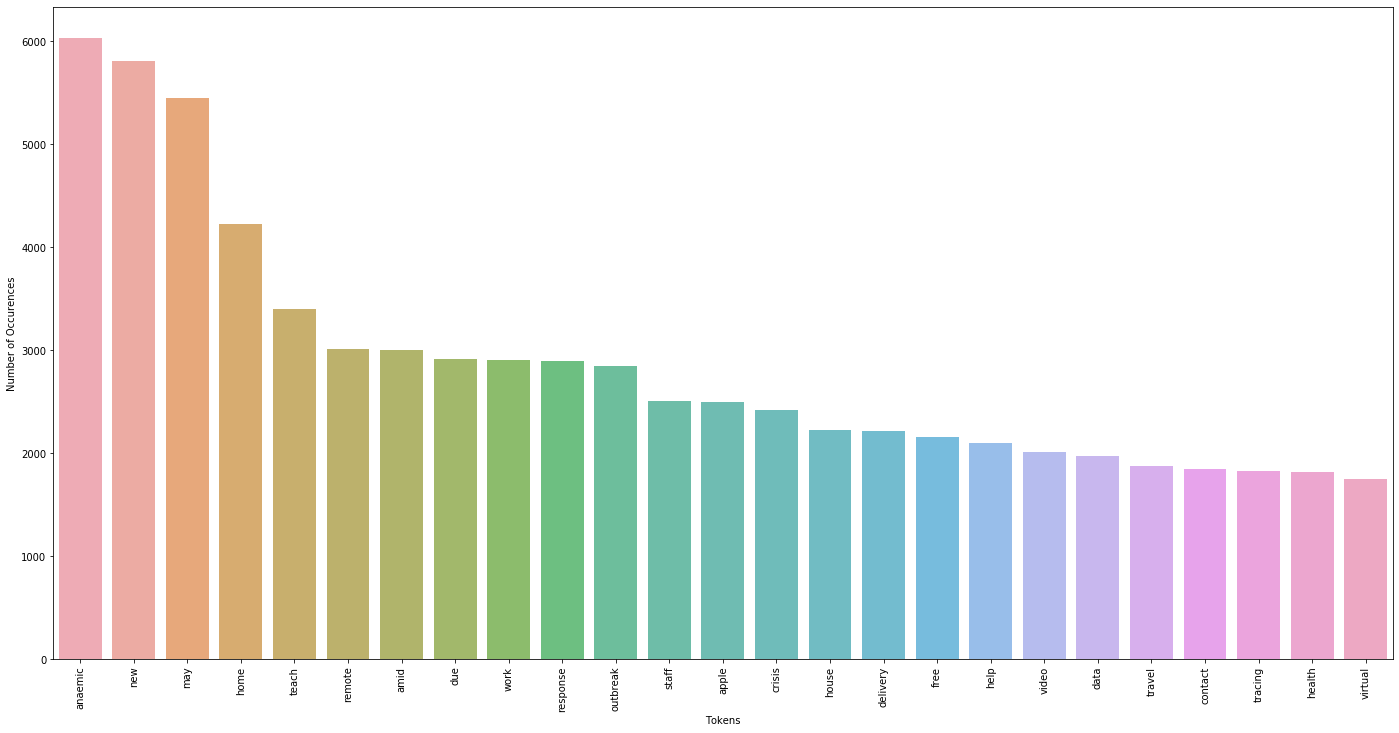

In [111]:
cnt_tokens = df['Tokens'].value_counts()[5:30]
plt.figure(figsize=(24,12))
sb.barplot(cnt_tokens.index, cnt_tokens.values, alpha=0.8)
plt.ylabel('Number of Occurences')
plt.xlabel('Tokens')
plt.xticks(rotation=90)
plt.show()

#### 4.4.e Plot the Next 25 most common words

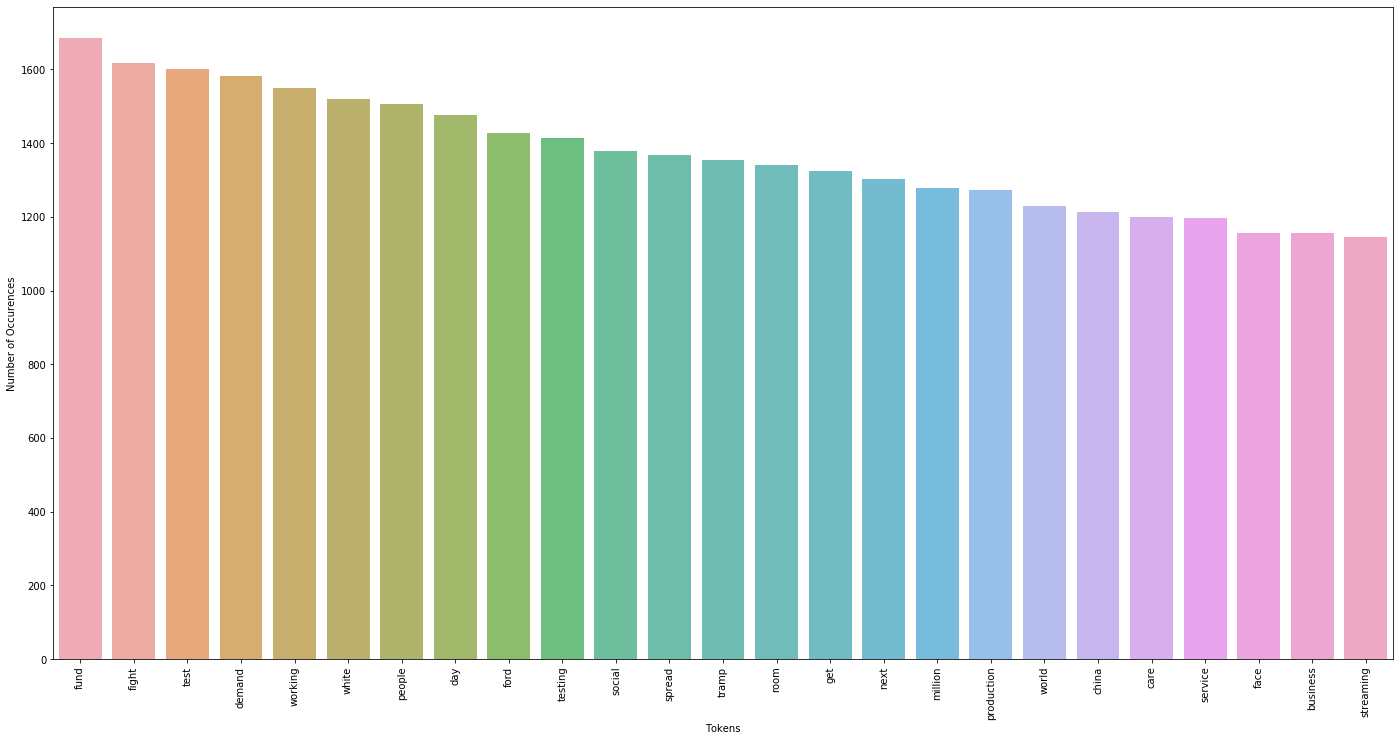

In [112]:
cnt_tokens = df['Tokens'].value_counts()[30:55]
plt.figure(figsize=(24,12))
sb.barplot(cnt_tokens.index, cnt_tokens.values, alpha=0.8)
plt.ylabel('Number of Occurences')
plt.xlabel('Tokens')
plt.xticks(rotation=90)
plt.show()

## 5. Creating WordCloud Typography

### 5.1 Importing Libraries and Loading Images

In [147]:
import cv2
from wordcloud import WordCloud
import numpy as np
from PIL import Image

image = cv2.imread(r'.\corona.jpg')

### 5.2 Convert into Contours

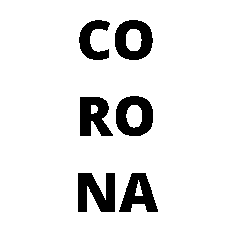

In [154]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap="gray")
plt.axis("off")
plt.show()

### 5.3 Create an Inverted Image

In [159]:
image = cv2.imread(r'.\corona.jpg')
image_inv = cv2.bitwise_not(image)
cv2.imwrite("corona_inv.jpg", image_inv)

True

### 5.4 Creating Masks

#### 5.4.a Background

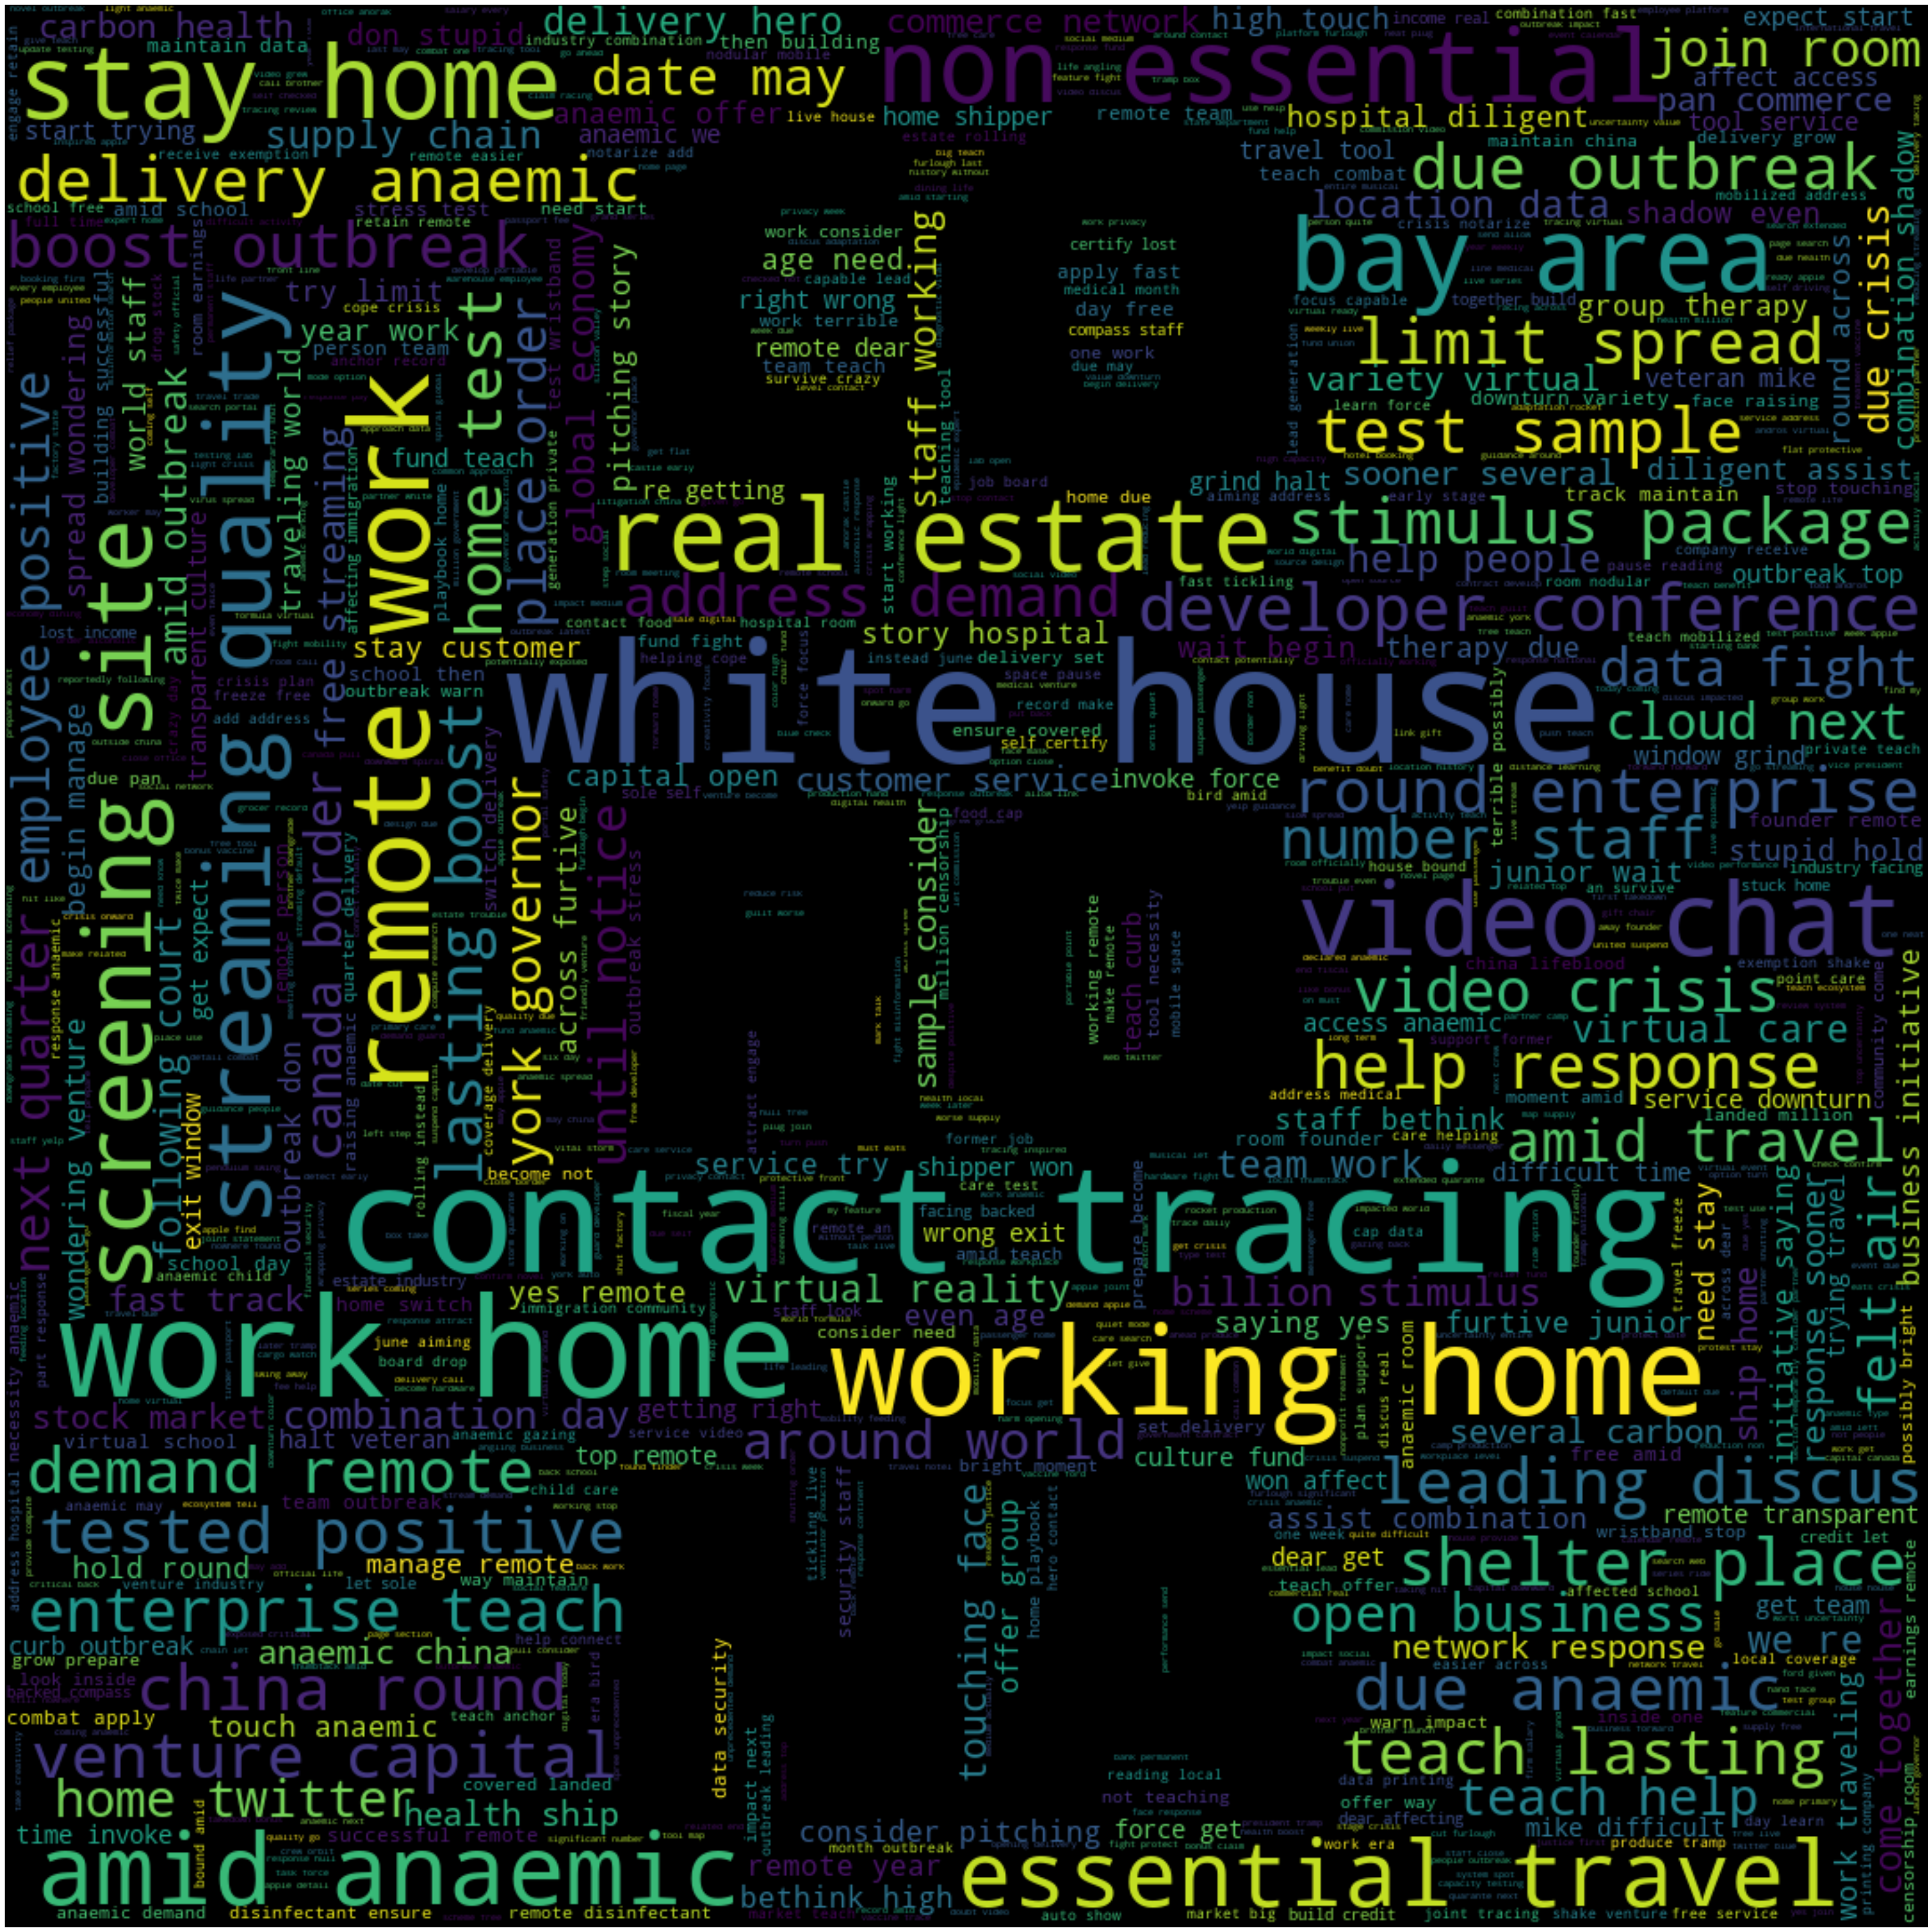

In [198]:
# color_func = lambda *args, **kwargs: 'black'
wc = WordCloud(background_color = 'black', mask = image, mode="RGB", width = 100, height = 100, max_words = 3000, random_state=2).generate(text)
fig1 = plt.figure(figsize=(40,40))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad = 0)
plt.axis("off")
plt.show()
#plt.savefig('background_kohli.jpg',dpi=300, bbox_inches='tight')

#### 5.4.b Foreground

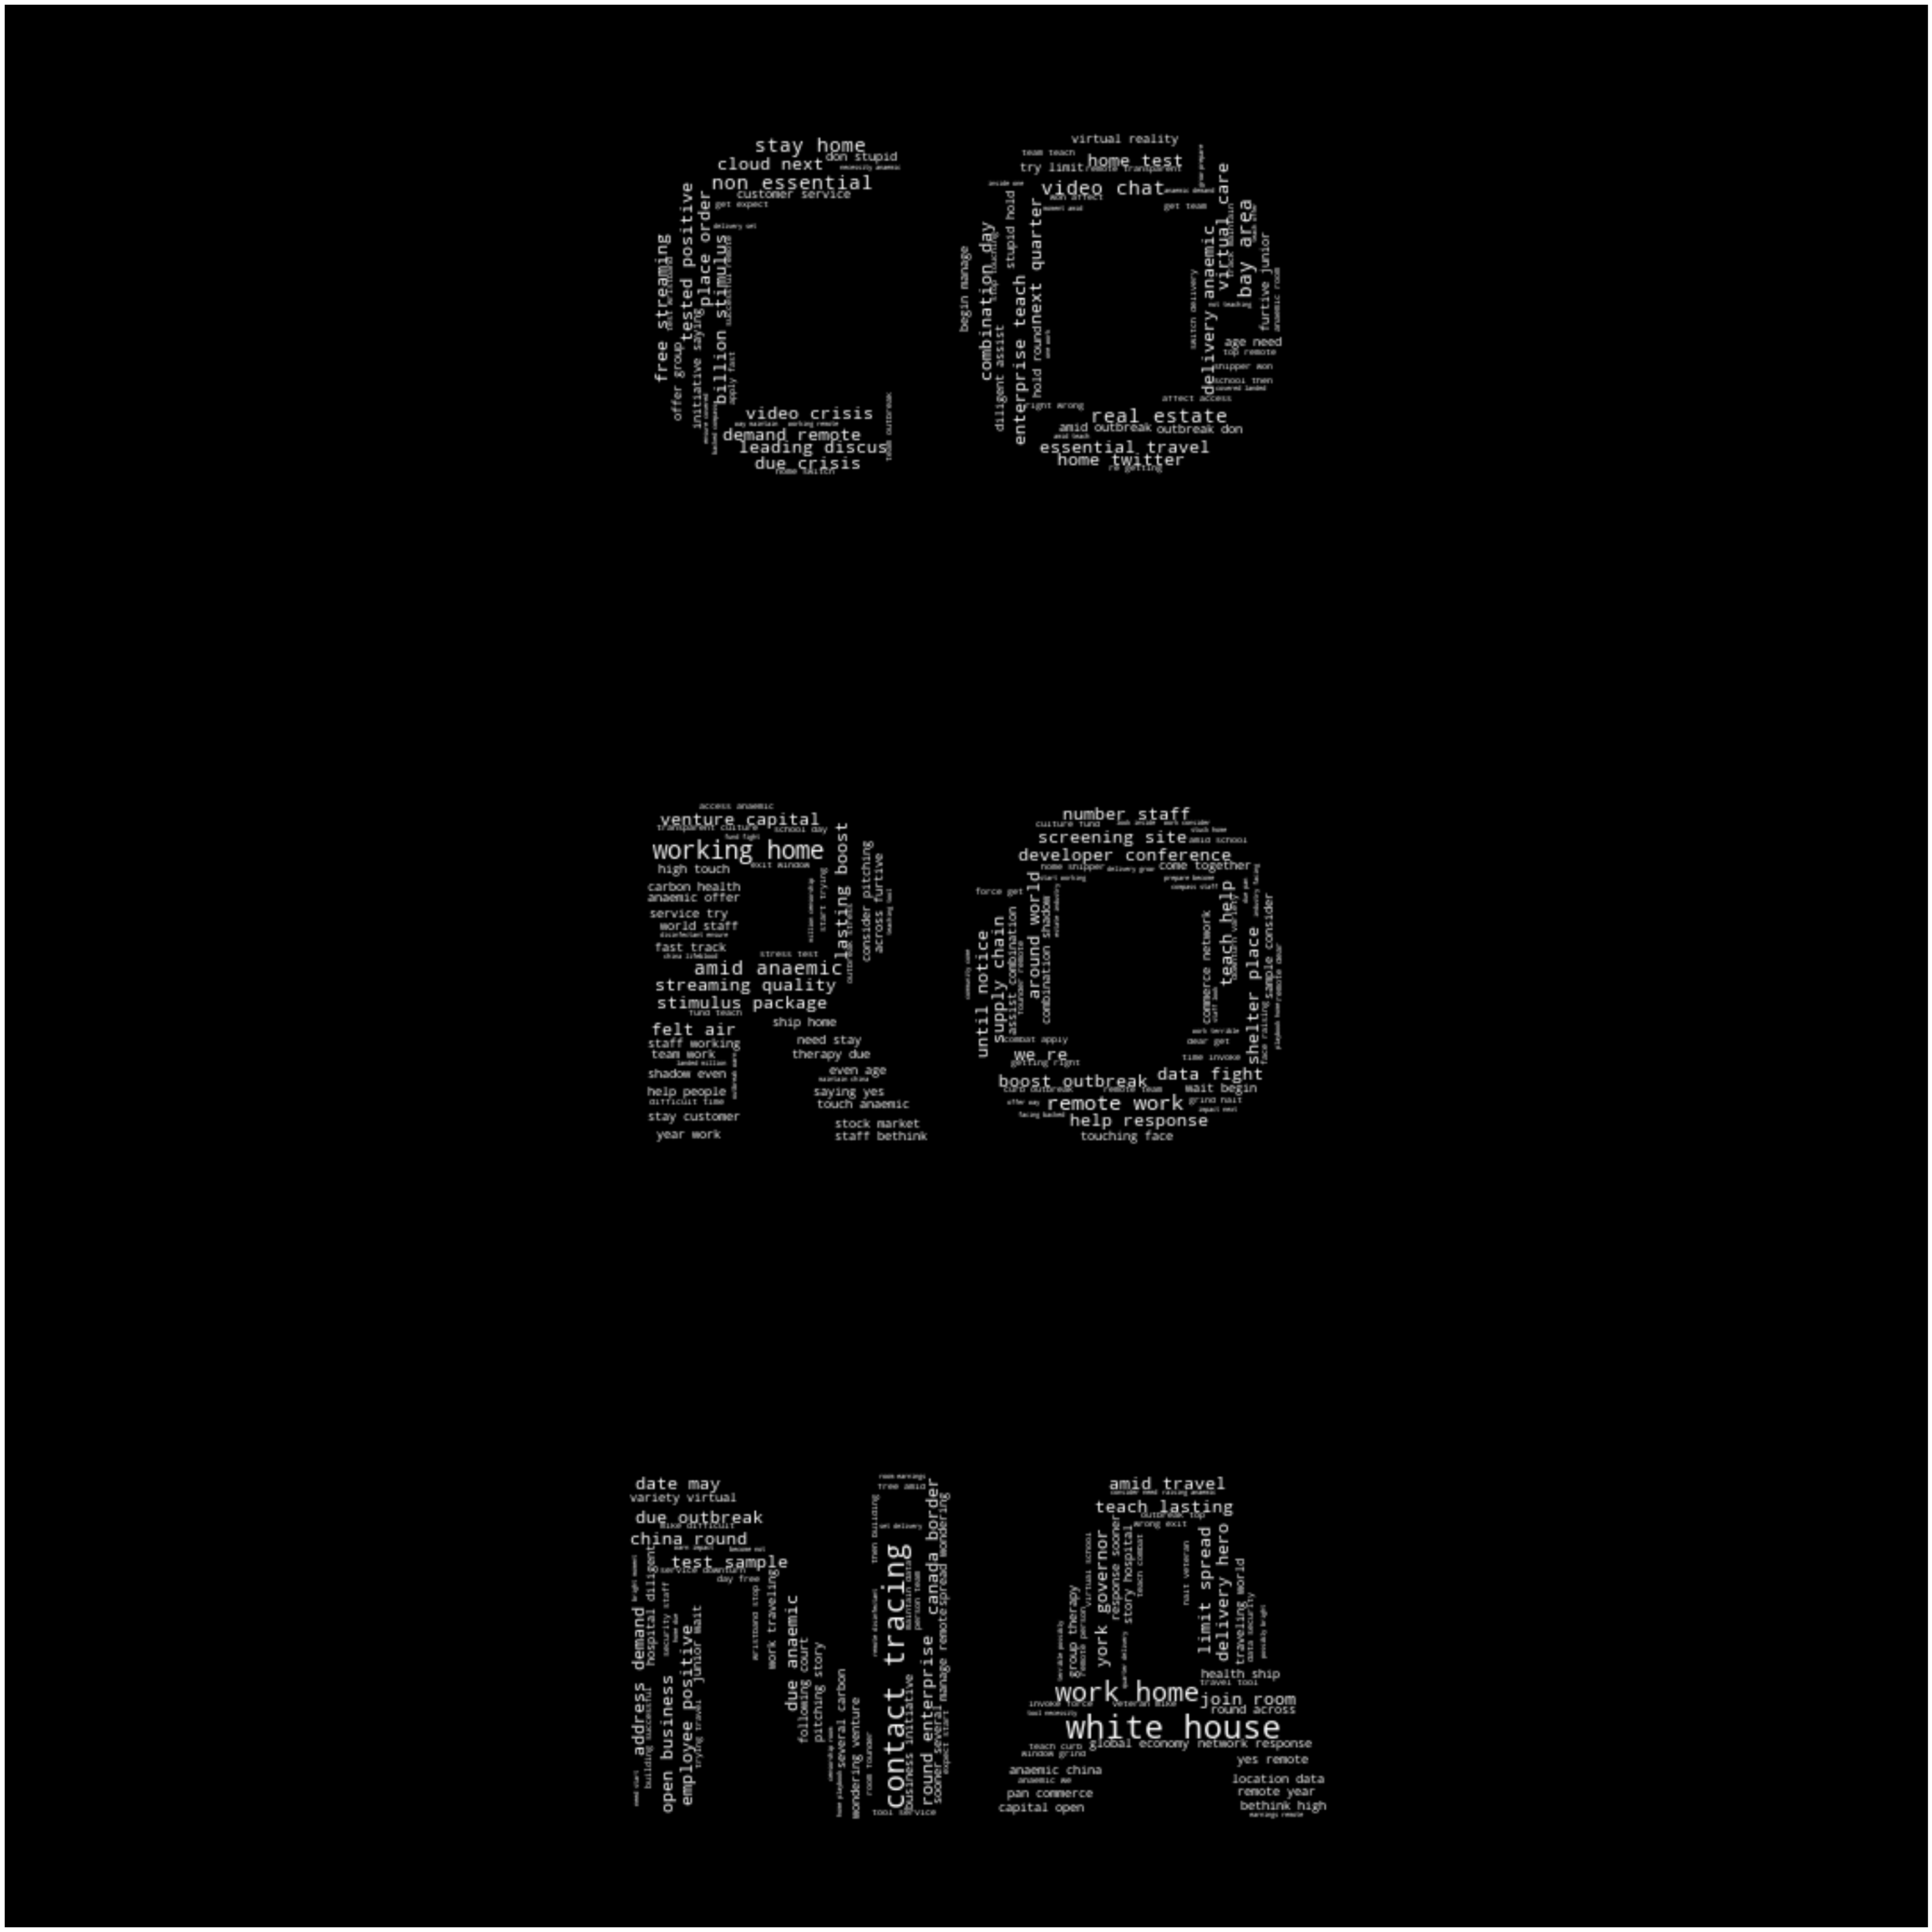

In [207]:
wc = WordCloud(background_color = 'black', mask = image_inv, color_func = lambda *args, **kwargs: 'white', max_words = 2000, width = 100, height = 100, random_state = 1).generate(text)
fig2 = plt.figure(figsize=(40,40))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad = 0)
plt.axis("off")
plt.show()
#plt.savefig('foreground_kohli.jpg',dpi=300, bbox_inches='tight')

### 5.5 Merging the Masks

In [199]:
im = Image.open(r'.\background_corona-3.png')
im = im.convert("RGB")
im.save(r'.\background_corona-3.jpg')

#im = Image.open(r'.\foreground_corona-3.png')
#im = im.convert("RGB")
#im.save(r'.\foreground_corona-3.jpg')

bg = cv2.imread(r'.\background_corona-3.jpg')
fg = cv2.imread(r'.\foreground_corona-2.jpg')

In [200]:
width = fg.shape[1]
height = fg.shape[0]
dim = (width, height)

bg = cv2.resize(bg, dim, interpolation = cv2.INTER_AREA)

In [205]:
result = cv2.addWeighted(fg, 1.0, bg, 1.0, 0)

In [206]:
filename = keyword.replace(" ","_") + "8.jpg"
cv2.imwrite(filename, result)

True